## This notebook has some functions for calculating wave statistics and plots

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Ahmed\\Downloads\\Python\\Data_Analysis'

In [7]:
# Example of the data file
df = pd.read_csv('./waves/wave_clean.csv')
df.head(3)

,Hs,Tp,Dir
0,0.31800,5.598,335.80
1,0.09422,5.069,57.03
2,0.54360,6.119,95.20


In [8]:
def wave_stat_table(df2):
    ## This function calculates the pivote table (%) (Bivariate distribution) of Hs and Dir
    ## The input dataframe must include the SWH as 'Hs', Direction as 'Dir' and optionally Peak Period as 'Tp'
    
    # Categorize the wave data into specific bins
    Hs_binz= [x for x in np.arange(0, df2.Hs.max()+0.5,0.5)]
    Hs_labelz = [str(x) for x in Hs_binz[1:]]
    Dir_bins = [0,11.25,33.75,56.25,78.75,101.25,123.75,146.25,168.75,191.25,213.75,236.25,258.75,281.25,303.75,326.25,348.75,360]
    #binzzz = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4','4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5']

    df2['Hs_cat'] = pd.cut(df2.Hs, bins= Hs_binz, labels=Hs_labelz, include_lowest= True)
    df2['Dir_cat'] = pd.cut(df2.Dir, bins= Dir_bins, labels=['N', 'NNE','NE', 'ENE', 'E','ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 
                                           'W', 'WNW', 'NW', 'NNW', 'N1'],  include_lowest= True)

    # calculate the pivote table for Hs and Dir with aggregation by percentage of occurence 
   
    table = df2.pivot_table(values ='Hs', index='Dir_cat', columns='Hs_cat', aggfunc='count', margins=False,
                            margins_name='Total', fill_value=999)
    table = table.divide(df2.shape[0])*100
    table.iloc[0, :] = table.iloc[0, :] + table.iloc[-1, :]
    table.drop('N1', axis=0, inplace=True)
    table = table.round(2)
    table.to_csv('Wave_Statistics.csv', index_label=False)

In [12]:
def wave_heatmap_plot(df):
    ## This function plots a heat map (%) for the SWH-Direction distribution
    ## The input table must be in the form of a pivote table by percentage of occerence
    sns.set_context('paper')
    sns.set_style('whitegrid')
    plt.figure(figsize=(11,9))
    p = sns.heatmap(df, annot=True, cmap='Reds', annot_kws= {'fontsize': '12'}, square=False, cbar_kws = {'label': 'Percentage%'}, linewidths=2);
    p.set_xlabel('Significant Wave Hieght (m)', fontsize= 13);
    p.set_ylabel('Wave Directin (deg)', fontsize= 13);
    p.set_title('Distribution of percentage of SWH (m)/direction', fontsize=15);
    p.figure.axes[-1].yaxis.label.set_size(13)
    p.set_xticklabels(p.get_xmajorticklabels(), fontsize=13);
    p.set_yticklabels(p.get_ymajorticklabels(), fontsize=13);

    # Change the color bar label size
    cbaraxis = plt.gcf().axes[-1]    # get current figure
    cbaraxis.tick_params(labelsize=13)
    fig = p.get_figure()
    fig.savefig('Figure.png')
    

In [9]:
wave_stat_table(df)

In [10]:
df1 = pd.read_csv('Wave_Statistics.csv')
df1.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
N,3.56,1.23,0.00,0.00,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NNE,3.97,1.57,0.14,0.14,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NE,3.08,1.98,1.23,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENE,3.01,1.23,0.27,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,2.46,1.10,0.41,0.00,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


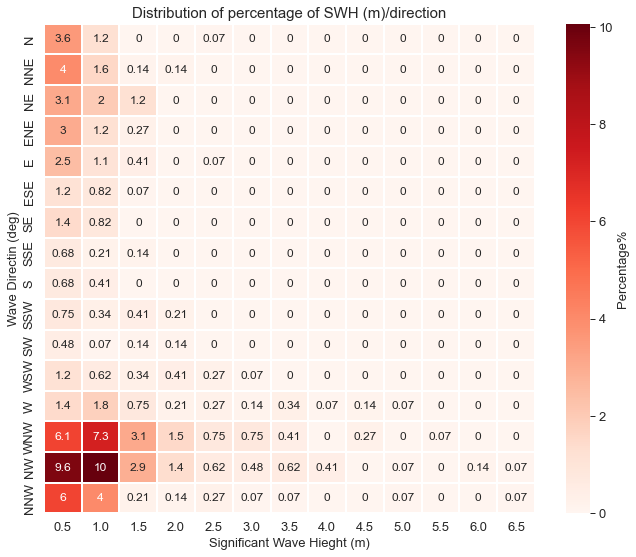

In [13]:
wave_heatmap_plot(df1)

In [57]:
df2 = pd.read_excel('Dam_2010_200m.xlsx')
df2.head()
df2.shape

(2126, 3)

In [58]:
wave_stat_table(df2)

In [62]:
    Hs_binz= [x for x in np.arange(0, df2.Hs.max()+0.5,0.5)]
    Hs_labelz = [str(x) for x in Hs_binz[1:]]
    Dir_bins = [0,11.25,33.75,56.25,78.75,101.25,123.75,146.25,168.75,191.25,213.75,236.25,258.75,281.25,303.75,326.25,348.75,360]
    #binzzz = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4','4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5']

    df2['Hs_cat'] = pd.cut(df2.Hs, bins= Hs_binz, labels=Hs_labelz, include_lowest= True)
    df2['Dir_cat'] = pd.cut(df2.Dir, bins= Dir_bins, labels=['N', 'NNE','NE', 'ENE', 'E','ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 
                                           'W', 'WNW', 'NW', 'NNW', 'N1'],  include_lowest= True)

    # calculate the pivote table for Hs and Dir with aggregation by percentage of occurence 
   
    table = df2.pivot_table(values ='Hs', index='Dir_cat', columns='Hs_cat', aggfunc='count', margins=False,
                            margins_name='Total', fill_value=999)
    table = table.divide(df2.shape[0])*100
    table.iloc[0, :] = table.iloc[0, :] + table.iloc[-1, :]
    table.drop('N1', axis=0, inplace=True)
    table = table.round(2)
    table.to_csv('Wave_Statistics.csv', index_label=False)

In [63]:
df3 = pd.read_csv('Wave_Statistics.csv')
df3.head(16)


,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0
N,8.33,2.78,1.55,0.80,0.28,0.33,0.33,0.14,0.00,0.19,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
NNE,1.93,2.40,0.75,0.47,0.52,0.38,0.00,0.09,0.05,0.00,0.05,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
NE,0.75,1.18,0.61,0.09,0.56,0.05,0.19,0.09,0.19,0.14,0.05,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
ENE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
E,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
ESE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
SE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
SSE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
S,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
SSW,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00


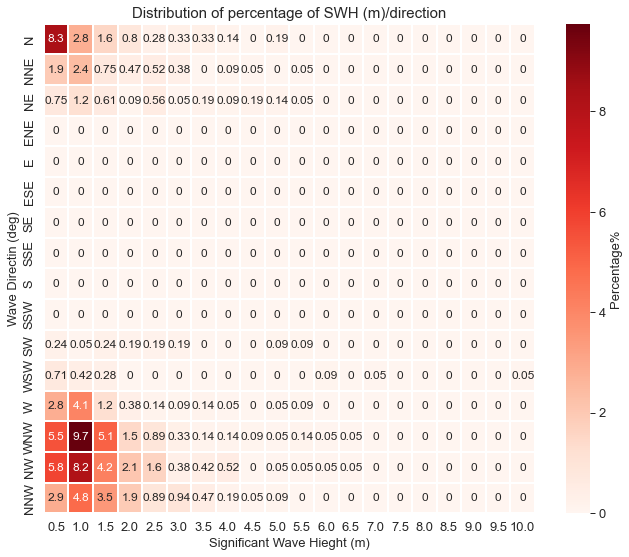

In [64]:
wave_heatmap_plot(df3)

In [65]:
pip install windrose

  Using cached windrose-1.7.0-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [82]:
from windrose import WindroseAxes
import matplotlib.cm as cm

In [68]:
df2.head()

,Hs,Tp,Dir,Hs_cat,Dir_cat
0,1.523077,6.4,345.1,2.0,NNW
1,2.935385,8.1,33.6,3.0,NNE
2,2.506154,7.6,349.1,3.0,N1
3,2.644615,8.1,328.3,3.0,NNW
4,3.544615,8.3,359.4,4.0,N1


In [69]:
wd = df2.Dir
ws = df2.Hs

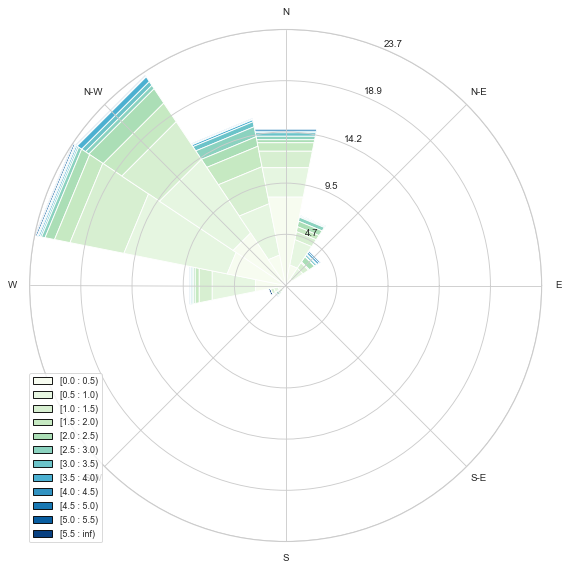

In [93]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, bins = np.arange(0, 6, 0.5), opening=1, cmap = cm.GnBu, edgecolor='white')
ax.set_legend();
ax.set_label('Hs (m)')

In [97]:
df4 = pd.read_excel('Waves_Idku_2004_200m.xlsx')

In [98]:
df4.head()

,Hs,Tp,Dir
0,0.858,7.1,324.9
1,0.676,7.1,330.7
2,0.611,6.8,285.9
3,0.910,6.1,272.9
4,0.793,6.4,291.7


In [99]:
wave_stat_table(df4)

In [100]:
df5 = pd.read_csv('Wave_Statistics.csv')
df5.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5
N,3.18,1.20,0.09,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NNE,1.52,1.89,1.11,0.46,0.18,0.05,0.0,0.09,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NE,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENE,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


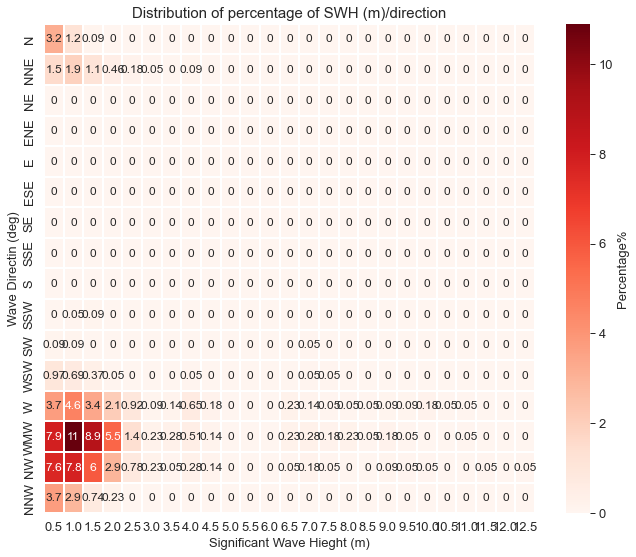

In [101]:
wave_heatmap_plot(df5)

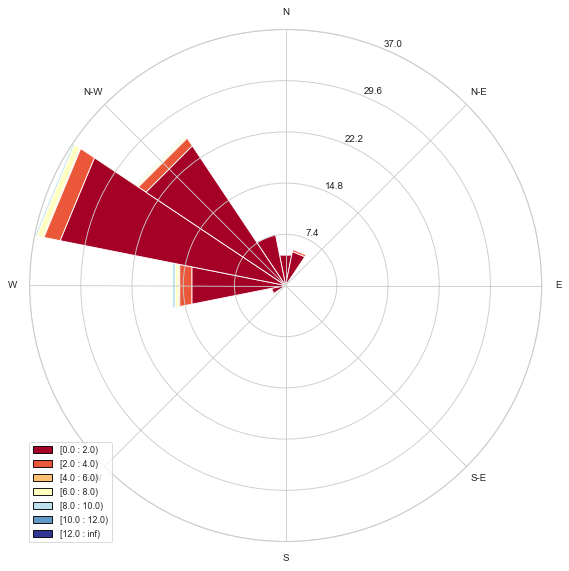

In [116]:
# plotting of the wave rose
wd = df4.Dir
ws = df4.Hs
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, bins = np.arange(0, df4.Hs.max(), 2), opening=1, cmap = cm.RdYlBu, edgecolor='white')
ax.set_legend();
ax.set_label('Hs (m)');